In [1]:
import numpy as np
import matplotlib.pyplot as plt
from noise_correlations import discriminability, null_models, plot

In [2]:
angle = np.pi/4
r = np.array([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]])
cov0 = r.dot(np.array([[5., 0.], [0., 25.]])).dot(r.T)
cov1 = cov0
deltas = np.array([np.sqrt(5)/2.])

label = 0

In [34]:
angle = np.pi/4
r = np.array([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]])
cov0 = r.dot(np.array([[5., 0.], [0., 25.]])).dot(r.T)
cov1 = r.dot(np.array([[10., 0.], [0., 20.]])).dot(r.T)
deltas = np.array([2. * np.sqrt(5)])

label = 1

In [35]:
n_dtheta = 15
thetas = np.linspace(-np.pi/2, np.pi/2, n_dtheta)
measures = [discriminability.linear_discriminability, discriminability.mv_normal_jeffreys,
            discriminability.lda_samples, discriminability.qda_samples]

results = np.zeros((n_dtheta, n_dtheta, deltas.size, len(measures)))

for ii, theta0 in enumerate(thetas):
    r0 = np.array([[np.cos(theta0), np.sin(theta0)], [-np.sin(theta0), np.cos(theta0)]])
    cov0p = r0.dot(cov0).dot(r0.T)
    for jj, theta1 in enumerate(thetas):
        r1 = np.array([[np.cos(theta1), np.sin(theta1)], [-np.sin(theta1), np.cos(theta1)]])
        cov1p = r1.dot(cov1).dot(r1.T)
        for kk, delta in enumerate(deltas):
            mu0 = delta * np.array([-1., 1.]) / np.sqrt(2)
            mu1 = -mu0
            mu0 += 10
            mu1 += 10
            for nn, m in enumerate(measures):
                if nn > 1:
                    results[ii, jj, kk, nn] = m(mu0, cov0p, mu1, cov1p, size=10000)
                else:
                    results[ii, jj, kk, nn] = m(mu0, cov0p, mu1, cov1p)
#results -= results.min(axis=(0, 1, 2), keepdims=True)
#results /= results.max(axis=(0, 1, 2), keepdims=True)

0.0 0.0


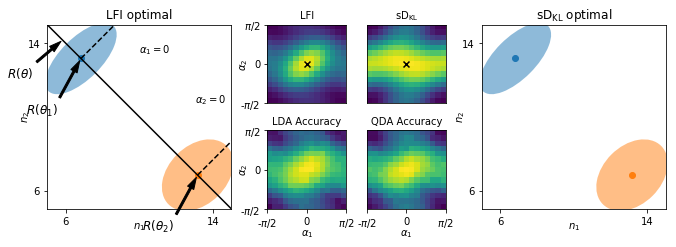

In [36]:
figsize=(9, 3.15)
f = plt.figure(figsize=figsize)

le = .04
re = .005
te = .07

hg = .045
hg2 = .25 * hg
vg = .12


width = 1. - le - re - 2 * hg - hg2
width2 = width / 3.
width1 = width2 / 2.

full_h = width2 * figsize[0] / figsize[1]
half_h = .5 * (full_h - vg)
be = 1 - te - full_h

ax0 = f.add_axes([le, be, width2, full_h])

ax5 = f.add_axes([1. - re - width2, be, width2, full_h])

x0 = le + width2 + hg
x1 = le + width2 + hg + width1 + hg2
y0 = be + half_h + vg
ax1 = f.add_axes([x0, y0, width1, half_h])
ax2 = f.add_axes([x1, y0, width1, half_h])
ax3 = f.add_axes([x0, be, width1, half_h])
ax4 = f.add_axes([x1, be, width1, half_h])

delta_idx = -1
delta = deltas[delta_idx]
mu0 = delta * np.array([-1., 1.]) / np.sqrt(2)
mu1 = -mu0
mu0 += 10
mu1 += 10
plot.plot_ellipses(mu0, cov0, mu1, cov1, faxes=(f, ax0))
ax0.set_ylim(5, 15)
ax0.set_xlim(5, 15)
ax0.plot([-2 * delta + 10, 2 * delta + 10], [2 * delta + 10, -2 * delta + 10], c='k')
ax0.plot([mu0[0], mu0[0]+3], [mu0[1], mu0[1]+3], c='k', ls='--')
ax0.plot([mu1[0], mu1[0]+3], [mu1[1], mu1[1]+3], c='k', ls='--')

mu0 = delta * np.array([-1., 1.]) / np.sqrt(2)
mu1 = -mu0
mu0 += 10
mu1 += 10
data = np.squeeze(results)[:, :, 1]
t1, t0 = np.unravel_index(data.argmax(), data.shape)
t0 = thetas[t0]
t1 = thetas[t1]
print(t0, t1)
r0 = np.array([[np.cos(t0), np.sin(t0)], [-np.sin(t0), np.cos(t0)]])
r1 = np.array([[np.cos(t1), np.sin(t1)], [-np.sin(t1), np.cos(t1)]])
plot.plot_ellipses(mu0, r0.dot(cov0.dot(r0.T)), mu1, r1.dot(cov1.dot(r1.T)), faxes=(f, ax5))
ax5.set_ylim(5, 15)
ax5.set_xlim(5, 15)
ax5.set_xlabel(r'$n_1$', labelpad=-5)
ax5.set_ylabel(r'$n_2$', labelpad=-5)

arrow_props = dict(facecolor='black', shrink=0.05, width=2, headwidth=7)
ax0.annotate(r'$R(\theta_1)$', xy=mu0, xytext=mu0-3, fontsize=12,
            arrowprops=arrow_props)
ax0.annotate(r'$R(\theta_2)$', xy=mu1, xytext=mu1-3, fontsize=12,
            arrowprops=arrow_props)
ax0.annotate(r'$R(\theta)$', xy=mu0+np.array([-1, 1]), xytext=mu0+np.array([-4, -1]), fontsize=12,
            arrowprops=arrow_props)
ax0.text(10, 13.5, r'$\alpha_1=0$')
ax0.text(13, 10.75, r'$\alpha_2=0$')


ax1.imshow(results[:, :, 0, 0][::-1], extent=[-np.pi/2, np.pi/2, -np.pi/2, np.pi/2])
ax1.scatter(0, 0, c='k', marker='x')
ax2.imshow(results[:, :, 0, 1][::-1], extent=[-np.pi/2, np.pi/2, -np.pi/2, np.pi/2])
ax2.scatter(t0, t1, c='k', marker='x')
ax3.imshow(results[:, :, 0, 2][::-1], extent=[-np.pi/2, np.pi/2, -np.pi/2, np.pi/2])
ax4.imshow(results[:, :, 0, 3][::-1], extent=[-np.pi/2, np.pi/2, -np.pi/2, np.pi/2])

ax1.set_title('LFI', fontsize=10)
ax2.set_title(r'$\mathregular{sD}_\mathregular{KL}$', fontsize=10)
ax3.set_title('LDA Accuracy', fontsize=10)
ax4.set_title('QDA Accuracy', fontsize=10)

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim([-np.pi/2, np.pi/2])
    ax.set_ylim([-np.pi/2, np.pi/2])
for ax in [ax3, ax4]:
    ax.set_xlabel(r'$\alpha_1$', labelpad=-1)
    ax.set_xticks([-np.pi/2, 0, np.pi/2])
    ax.set_xticklabels([r'-$\pi$/2', '0', r'$\pi$/2'])
for ax in [ax1, ax3]:
    ax.set_ylabel(r'$\alpha_2$', labelpad=-10)
    ax.set_yticks([-np.pi/2, 0, np.pi/2])
    ax.set_yticklabels([r'-$\pi$/2', '0', r'$\pi$/2'])
for ax in [ax0, ax5]:
    ax.set_xticks([6, 14])
    ax.set_yticks([6, 14])
    ax.set_xlabel(r'$n_1$', labelpad=-5)
    ax.set_ylabel(r'$n_2$', labelpad=-5)

ax0.set_title('LFI optimal')
ax5.set_title(r'$\mathregular{sD}_\mathregular{KL}$ optimal')

plt.savefig('optimal_orientations_{}.pdf'.format(label), dpi=300)